# Projeto Final

Neste módulo, vamos fazer um estudo de caso para praticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo com de 4 a 5 pessoas e seguir o passo a passo abaixo.

1. Escolher um Dataset com pelo menos 1000 linhas, valide com o professor se o dataset escolhido é válido
  * Kaggle
  * UCI
  * Governo Brasileiro(Desmatamento, crime, etc.)

  dataset: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

2. Definir uma aplicação de Machine Learning para aplicar ao Dataset

   a. Esta aplicação pode ser uma regressão ou uma classificação para predizer um target a sua escolha.

3. Fazer a análise com pelo menos 2 estimadores, comparando os resultados

4. Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

5. Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção

A avaliação será feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos. Pede-se que cada grupo preencha na planilha o dataset escolhido.


**História**

Thaysa, musa fitness, quer virar influencer e decide criar um canal no youtube para promover a saúde e bem estar social.

Como ela também é uma cientista de dados, vai fazer uma análise para ajudar e nortear seu canal para ter sucesso!!!

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [6]:
youtube = pd.read_csv('Datasets/GlobalYouTubeStatistics.csv',
                      header= 0,
                      encoding= 'unicode_escape'
)

In [7]:
pd.set_option('display.max_column', None)

In [8]:
youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


## Análise do dataset

In [9]:
youtube.shape

(995, 28)

In [10]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [11]:
youtube.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [12]:
youtube.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

## Tratando o dataset

In [14]:
# Encoder algumas colunas que podem nos ser relevante
import category_encoders as ce
count_encoder = ce.CountEncoder()

In [15]:
# Category
category_count_encoder = ce.CountEncoder(cols=['category'])
youtube = category_count_encoder.fit_transform(youtube)

In [16]:
# Country
country_count_encoder = ce.CountEncoder(cols=['Country'])
youtube = country_count_encoder.fit_transform(youtube)

In [17]:
youtube.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,202,T-Series,20082,168,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,46,youtubemovies,1,313,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,241,MrBeast,741,313,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,45,Cocomelon - Nursery Rhymes,966,313,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,13,SET India,116536,168,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [18]:
# Novo df com as colunas encodadas e excluindo as colunas object
'''
EXCLUIR
Youtuber
Title
Abbreviation
country_rank
channel_type_rank
created_month
created_date
gross_tertiary_education_enrollment(%)
population
unemployment_rate
urban_population
latitude
longitude
'''
youtube_norm = pd.DataFrame({
  'rank': youtube['rank'],
  'subscribers': youtube['subscribers'],
  'video_views': youtube['video views'],
  'category': youtube['category'],
  'uploads': youtube['uploads'],
  'country': youtube['Country'],
  # 'channel_type_encoded': channel_type_encoded,
  # 'video_views_rank': youtube['video_views_rank'],
  # 'country_rank': youtube['country_rank'],
  'channel_type_rank': youtube['channel_type_rank'],
  'video_views_for_the_last_30_days': youtube['video_views_for_the_last_30_days'],
  'lowest_monthly_earnings': youtube['lowest_monthly_earnings'],
  # 'highest_monthly_earnings': youtube['highest_monthly_earnings'],
  # 'lowest_yearly_earnings': youtube['lowest_yearly_earnings'],
  # 'highest_yearly_earnings': youtube['highest_yearly_earnings'],
  'subscribers_for_last_30_days': youtube['subscribers_for_last_30_days'],
  'created_year': youtube['created_year'],
  # 'gross_tertiary_education_enrollment(%)': youtube['Gross tertiary education enrollment (%)'],
  # 'population': youtube['Population'],
  # 'unemployment_rate': youtube['Unemployment rate'],
  # 'urban_population': youtube['Urban_population'],
  # 'latitude': youtube['Latitude'],
  # 'longitude': youtube['Longitude']
})

In [19]:
youtube_norm.shape

(995, 11)

In [20]:
youtube_norm.dtypes

rank                                  int64
subscribers                           int64
video_views                         float64
category                              int64
uploads                               int64
country                               int64
channel_type_rank                   float64
video_views_for_the_last_30_days    float64
lowest_monthly_earnings             float64
subscribers_for_last_30_days        float64
created_year                        float64
dtype: object

In [21]:
youtube_norm.isna().sum()

rank                                  0
subscribers                           0
video_views                           0
category                              0
uploads                               0
country                               0
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
subscribers_for_last_30_days        337
created_year                          5
dtype: int64

In [22]:
# Drop nan values
# youtube_norm = youtube_norm.dropna(subset=['subscribers_for_last_30_days'])
youtube_norm = youtube_norm.dropna(subset=['video_views_for_the_last_30_days'])
youtube_norm = youtube_norm.dropna(subset=['channel_type_rank'])

In [23]:
youtube_norm['subscribers_for_last_30_days'] = youtube_norm['subscribers_for_last_30_days'].fillna(0)

In [24]:
youtube_norm.shape

(929, 11)

In [25]:
youtube_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 994
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              929 non-null    int64  
 1   subscribers                       929 non-null    int64  
 2   video_views                       929 non-null    float64
 3   category                          929 non-null    int64  
 4   uploads                           929 non-null    int64  
 5   country                           929 non-null    int64  
 6   channel_type_rank                 929 non-null    float64
 7   video_views_for_the_last_30_days  929 non-null    float64
 8   lowest_monthly_earnings           929 non-null    float64
 9   subscribers_for_last_30_days      929 non-null    float64
 10  created_year                      929 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 87.1 KB


In [26]:
youtube_norm.isna().sum()

rank                                0
subscribers                         0
video_views                         0
category                            0
uploads                             0
country                             0
channel_type_rank                   0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
subscribers_for_last_30_days        0
created_year                        0
dtype: int64

In [27]:
youtube_norm.describe()

,rank,subscribers,video_views,category,uploads,country,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,subscribers_for_last_30_days,created_year
count,929.000000,9.290000e+02,9.290000e+02,929.000000,929.000000,929.000000,929.000000,9.290000e+02,929.000000,9.290000e+02,929.000000
mean,499.288482,2.296039e+07,1.125701e+10,140.038751,9839.082885,153.922497,553.449946,1.775004e+08,39506.649623,2.469253e+05,2012.602799
std,288.339222,1.756462e+07,1.448762e+10,81.557869,35254.064164,123.534951,1640.991709,4.182143e+08,73670.097365,5.408143e+05,4.454322
min,1.000000,1.230000e+07,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,1970.000000
25%,251.000000,1.450000e+07,4.332275e+09,46.000000,278.000000,28.000000,26.000000,2.158700e+07,4400.000000,0.000000e+00,2009.000000
50%,499.000000,1.770000e+07,7.762906e+09,132.000000,846.000000,168.000000,63.000000,6.506600e+07,15700.000000,1.000000e+05,2013.000000
75%,750.000000,2.450000e+07,1.393002e+10,202.000000,3009.000000,313.000000,134.000000,1.698650e+08,41100.000000,3.000000e+05,2016.000000
max,995.000000,2.450000e+08,2.280000e+11,241.000000,301308.000000,313.000000,7733.000000,6.589000e+09,850900.000000,8.000000e+06,2022.000000


In [28]:
# sns.pairplot(youtube_norm, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

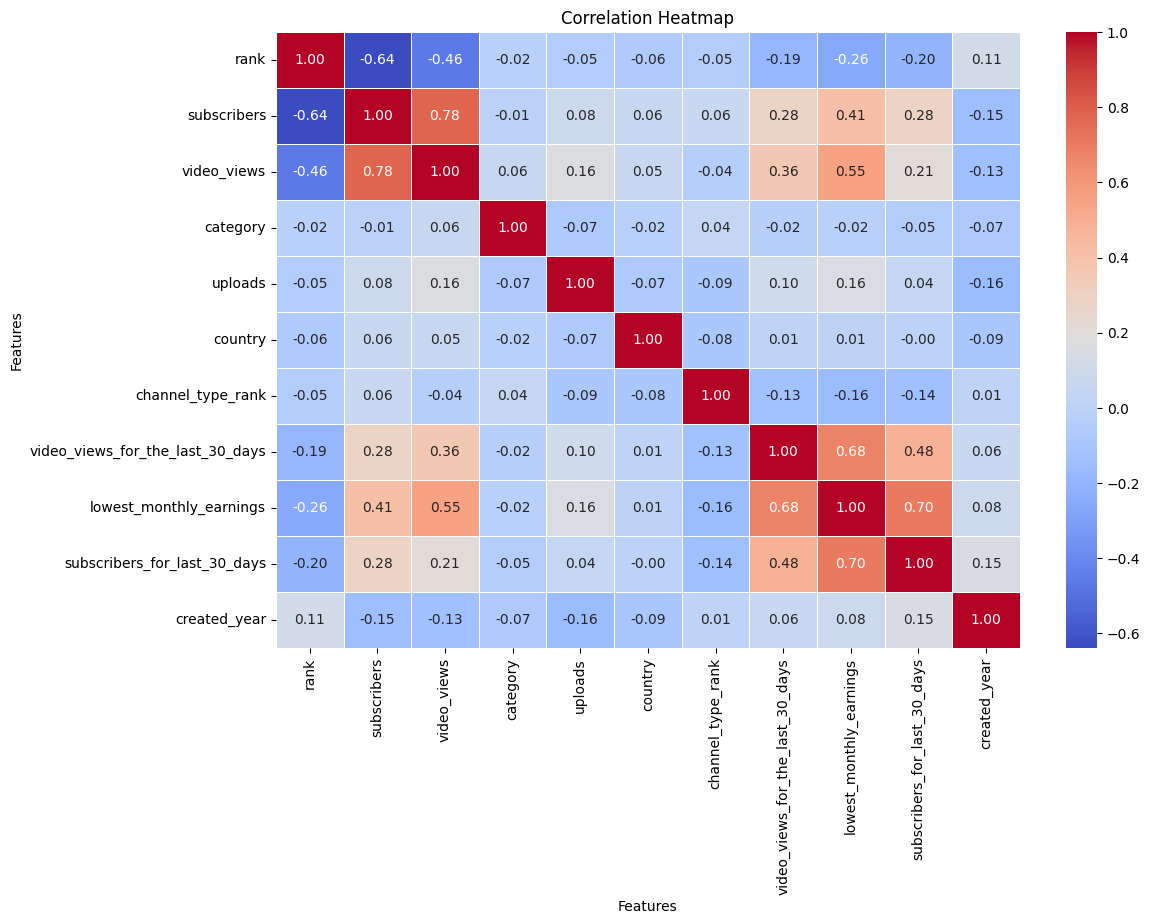

In [29]:
cmap = "coolwarm"
plt.figure(figsize=(12, 8))
sns.heatmap(youtube_norm.corr(), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap")
plt.show()

Algumas observações sobre as correlações:

- Todas as *colunas de dinheiro* tem correlação entre si de 1.
- As colunas *video_views_for_the_last_30_days*, *subscribers_for_last_30_days*, *video_views* e *subscribers* tem uma relação interessante com as *colunas de dinheiro*.
- As colunas *subscribers* e *video_views* tem uma correlação interessante entre si.

In [30]:
youtube_norm.head(2)

,rank,subscribers,video_views,category,uploads,country,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,subscribers_for_last_30_days,created_year
0,1,245000000,2.280000e+11,202,20082,168,1.0,2.258000e+09,564600.0,2000000.0,2006.0
1,2,170000000,0.000000e+00,46,1,313,7423.0,1.200000e+01,0.0,0.0,2006.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
X = youtube_norm.drop('lowest_monthly_earnings', axis=1)
y = youtube_norm['lowest_monthly_earnings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

## Aplicação da Regressão Linear (LinearRegression)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [36]:
y_pred_lr = lr.predict(X_test_ss)

In [37]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse_lr}") #  A lower MSE indicates better model performance
print(f"Mean Absolute Error (MAE): {mae_lr}") #  A lower MAE indicates better model performance.
print(f"R-squared (R2): {r2_lr}")

Mean Squared Error (MSE): 360696994.2305388
Mean Absolute Error (MAE): 11758.506994925105
R-squared (R2): 0.8413986551508164


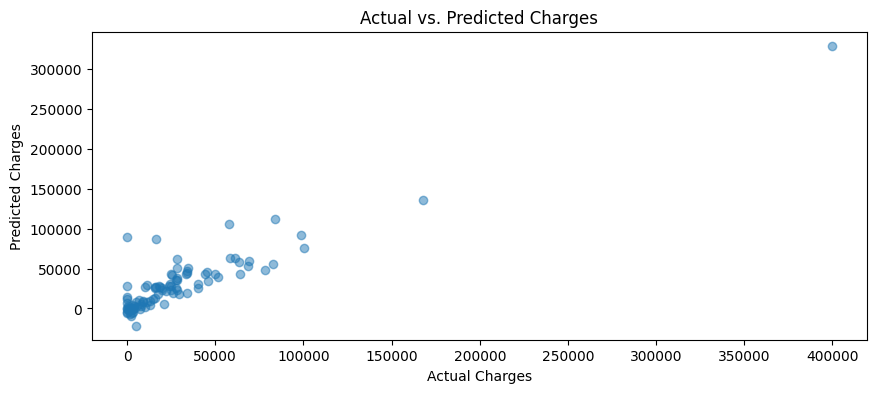

In [38]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

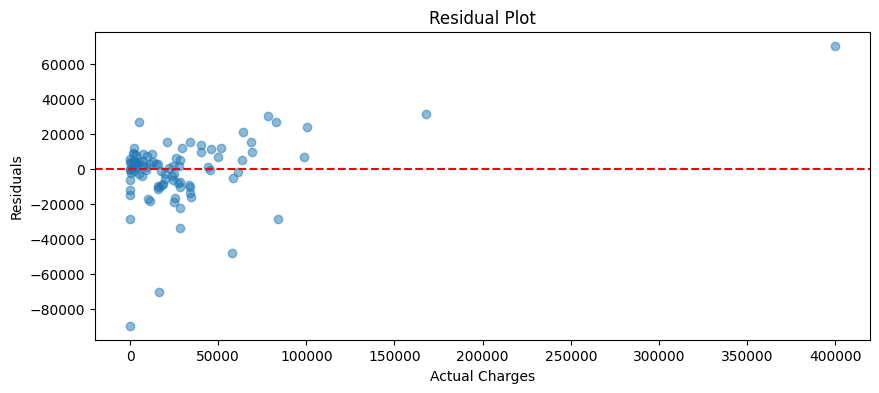

In [39]:
plt.figure(figsize=(10, 4))
residuals = y_test - y_pred_lr
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Aplicação da Regressão Linear (Elastic-Net)

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
en = ElasticNet()
en.fit(X_train_ss, y_train)

ElasticNet()

In [42]:
y_pred_en = lr.predict(X_test_ss)

In [43]:
mse_en = mean_squared_error(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"Mean Squared Error (MSE): {mse_en}") #  A lower MSE indicates better model performance
print(f"Mean Absolute Error (MAE): {mae_en}") #  A lower MAE indicates better model performance.
print(f"R-squared (R2): {r2_en}")

Mean Squared Error (MSE): 360696994.2305388
Mean Absolute Error (MAE): 11758.506994925105
R-squared (R2): 0.8413986551508164


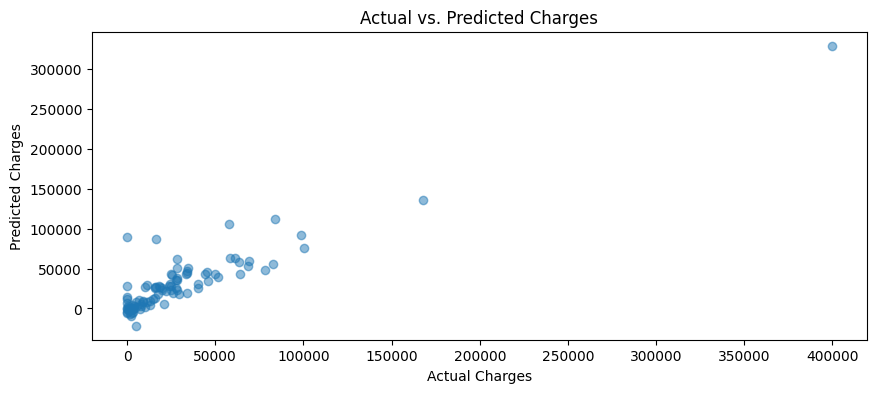

In [44]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred_en, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

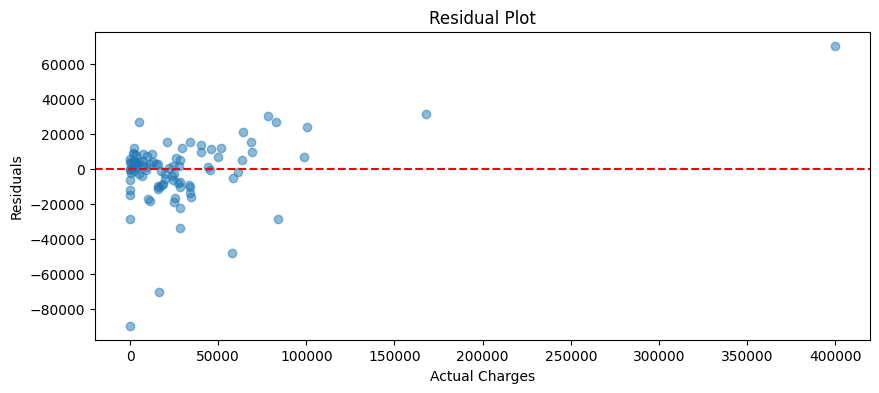

In [45]:
plt.figure(figsize=(10, 4))
residuals = y_test - y_pred_en
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Aplicação da Regressão por Classificação (KNN)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_ss, y_train)

KNeighborsRegressor()

In [48]:
y_pred_reg_knn = knn_reg.predict(X_test_ss)

In [49]:
mse_reg_knn = mean_squared_error(y_test, y_pred_reg_knn)
mae_reg_knn = mean_absolute_error(y_test, y_pred_reg_knn)
r2_reg_knn = r2_score(y_test, y_pred_reg_knn)

print(f"Mean Squared Error (MSE): {mse_reg_knn}") #  A lower MSE indicates better model performance
print(f"Mean Absolute Error (MAE): {mae_reg_knn}") #  A lower MAE indicates better model performance.
print(f"R-squared (R2): {r2_reg_knn}")

Mean Squared Error (MSE): 324972685.7620417
Mean Absolute Error (MAE): 11549.461182795698
R-squared (R2): 0.8571069184785927


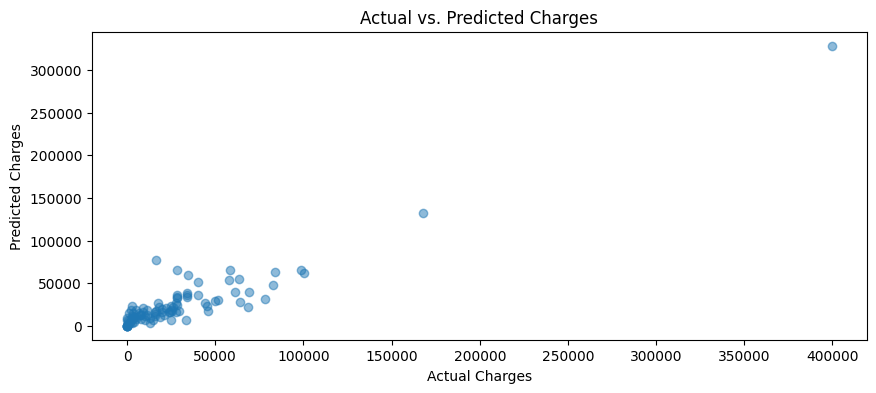

In [50]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred_reg_knn, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

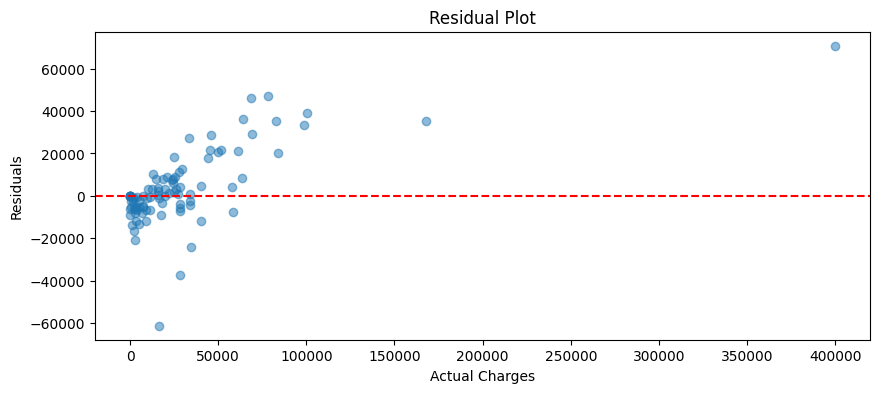

In [51]:
plt.figure(figsize=(10, 4))
residuals = y_test - y_pred_reg_knn
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Aplicação da Regressão Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_ss, y_train)
y_pred_for = regressor.predict(X_test_ss)

In [54]:
mse_reg_for = mean_squared_error(y_test, y_pred_for)
mae_reg_for = mean_absolute_error(y_test, y_pred_for)
r2_reg_for = r2_score(y_test, y_pred_for)

print(f"Mean Squared Error (MSE): {mse_reg_for}") #  A lower MSE indicates better model performance
print(f"Mean Absolute Error (MAE): {mae_reg_for}") #  A lower MAE indicates better model performance.
print(f"R-squared (R2): {r2_reg_for}")

Mean Squared Error (MSE): 61997581.36696767
Mean Absolute Error (MAE): 1426.8161731182795
R-squared (R2): 0.9727391690546967


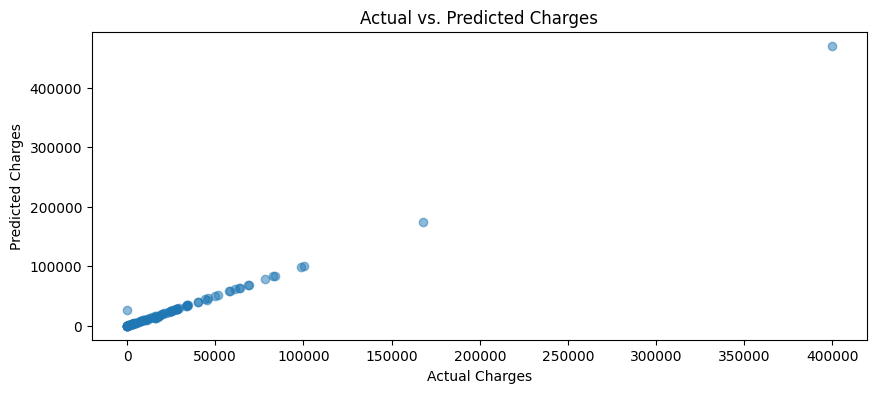

In [55]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred_for, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

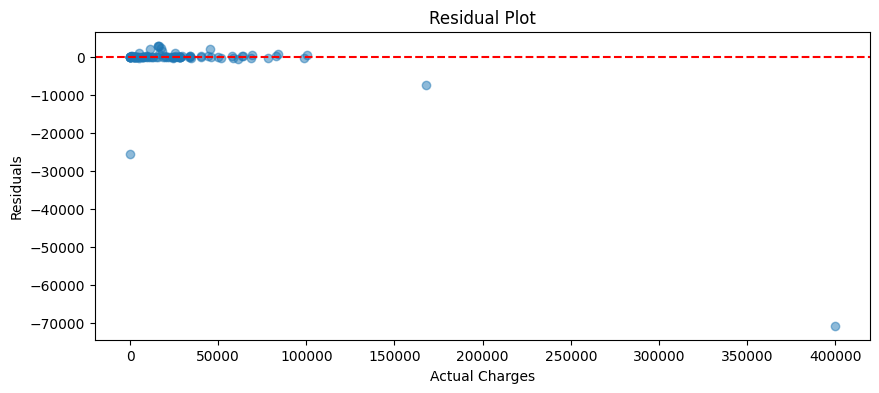

In [56]:
plt.figure(figsize=(10, 4))
residuals = y_test - y_pred_for
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## Comparativo das Regressões

In [57]:
print(f"Mean Squared Error (MSE):\n lr: {round(mse_lr)}\n en: {round(mse_en)}\n reg_knn: {round(mse_reg_knn)}\n reg_for: {round(mse_reg_for)}")
print(f"Mean Absolute Error (MAE):\n lr: {round(mae_lr)}\n en: {round(mae_en)}\n reg_knn: {round(mae_reg_knn)}\n reg_for: {round(mae_reg_for)}")
print(f"R-squared (R2):\n lr: {r2_lr}\n en: {r2_en}\n reg_knn: {r2_reg_knn}\n reg_for: {r2_reg_for}")

Mean Squared Error (MSE):
 lr: 360696994
 en: 360696994
 reg_knn: 324972686
 reg_for: 61997581
Mean Absolute Error (MAE):
 lr: 11759
 en: 11759
 reg_knn: 11549
 reg_for: 1427
R-squared (R2):
 lr: 0.8413986551508164
 en: 0.8413986551508164
 reg_knn: 0.8571069184785927
 reg_for: 0.9727391690546967


## Otimização dos Hiperparâmetros (Modelo escolhido: Forest)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'n_estimators': range(10, 100, 30),  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em uma folha
    'warm_start': [True, False],
    # 'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de recursos a serem considerados para dividir um nó
    'bootstrap': [True, False],  # Amostragem com substituição
    # 'random_state': [42, 100, 10, 1]  # Semente aleatória para reproducibilidade
}

fr = RandomForestRegressor()
grid_search = GridSearchCV(estimator=fr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search.fit(X_train_ss, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[CV 1/5; 1/432] START bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True
[CV 4/5; 1/432] START bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True
[CV 3/5; 1/432] START bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True
[CV 4/5; 1/432] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True;, score=0.648 total time=   0.2s
[CV 1/5; 1/432] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True;, score=0.917 total time=   0.2s
[CV 3/5; 1/432] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=True;, score=0.959 total time=   0.3s
[CV 4/5; 2/432] START bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10, warm_start=False
[CV 5/5; 2

In [66]:
print("Melhores hiperparâmetros:", best_params)
print("Melhor modelo:", best_model)

Melhores hiperparâmetros: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40, 'warm_start': False}
Melhor modelo: RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=40)


In [60]:
y_pred_for_bm = best_model.predict(X_test_ss)

In [61]:
mse_reg_for_bm = mean_squared_error(y_test, y_pred_for_bm)
mae_reg_for_bm = mean_absolute_error(y_test, y_pred_for_bm)
r2_reg_for_bm = r2_score(y_test, y_pred_for_bm)

In [62]:
print(f"Mean Squared Error (MSE):\n reg_for: {round(mse_reg_for)}\n reg_for: {round(mse_reg_for_bm)}")
print(f"Mean Absolute Error (MAE):\n reg_for: {round(mae_reg_for)}\n reg_for: {round(mae_reg_for_bm)}")
print(f"R-squared (R2):\n reg_for: {r2_reg_for}\n reg_for: {r2_reg_for_bm}")

Mean Squared Error (MSE):
 reg_for: 61997581
 reg_for: 35962381
Mean Absolute Error (MAE):
 reg_for: 1427
 reg_for: 1229
R-squared (R2):
 reg_for: 0.9727391690546967
 reg_for: 0.984187054378779


## Feature importance based on mean decrease in impurity

In [63]:
feature_names = list(X.columns.values.tolist())

In [64]:
import time

import numpy as np

start_time = time.time()
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


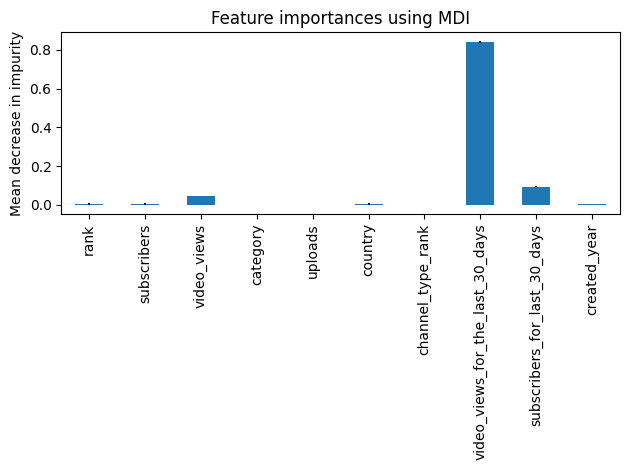

In [65]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()